In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3

In [5]:
#conv_base = VGG16(
#    weights='imagenet',
#    include_top = False,
#    input_shape=(224,224,3)
#)



# Create an instance of InceptionV3 with pre-trained weights (excluding top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
"""conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
 if set_trainable:
  layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
 print(layer.name,layer.trainable)"""


    # Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [11]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
'''model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(7,activation='sigmoid'))'''

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Custom function to add Gaussian noise
def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Clip to ensure pixel values remain in [0, 1]
    return noisy_img

# Custom DataGenerator with Gaussian noise
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, generator, add_noise=False, multiply_times=3):
        """
        Initializes the custom generator.
        :param generator: ImageDataGenerator.flow() object.
        :param add_noise: Whether to add Gaussian noise.
        :param multiply_times: How many times to augment the dataset.
        """
        self.generator = generator
        self.add_noise = add_noise
        self.multiply_times = multiply_times

    def __len__(self):
        return len(self.generator) * self.multiply_times

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx % len(self.generator)]
        if self.add_noise:
            batch_x = np.array([add_gaussian_noise(img) for img in batch_x])
        return batch_x, batch_y

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40  # Add random rotation within the range [-40, 40]
)

# Augmentation for validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory for training and validation
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    'E:\\jupyter notebook project\\Deep Learning Project\\dl\\foodclassificationtrainval\\train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'E:\\jupyter notebook project\\Deep Learning Project\\dl\\foodclassificationtrainval\\validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Wrap the train_generator with CustomDataGenerator to add Gaussian noise and multiply data
augmented_train_generator = CustomDataGenerator(
    generator=train_generator,
    add_noise=True,
    multiply_times=3  # Increase training data threefold
)


Found 868 images belonging to 7 classes.
Found 221 images belonging to 7 classes.


In [35]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=7)  # One-hot encode for 7 classes
    return image, label

# Apply the process function to train and validation datasets
train_ds = augmented_train_generator
validation_ds = validation_generator


In [49]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,908,135 (91.20 MB)

 Trainable params: 2,105,351 (8.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [51]:
# Fit the model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10


E:\Software\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/84 ━━━━━━━━━━━━━━━━━━━━ 2:43 3s/step - accuracy: 0.1235 - loss: 2.1563

E:\Software\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


84/84 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.2307 - loss: 1.9476 - val_accuracy: 0.5747 - val_loss: 1.3662
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5983 - loss: 1.2480 - val_accuracy: 0.6516 - val_loss: 1.0949
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7381 - loss: 0.9534 - val_accuracy: 0.7195 - val_loss: 0.9170
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.7747 - loss: 0.8003 - val_accuracy: 0.7376 - val_loss: 0.8484
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.7920 - loss: 0.7095 - val_accuracy: 0.7692 - val_loss: 0.7740
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.8313 - loss: 0.6225 - val_accuracy: 0.7919 - val_loss: 0.7036
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8523 - loss: 0.5424 - val_accuracy: 0.8100 - val_loss: 0.6704
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8510 - loss: 0.5167 - val_accuracy: 0.7919 - val_loss: 0.

In [53]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_ds, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_ds, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

Validation Loss: 0.6135
Validation Accuracy: 0.8054


E:\Software\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training Loss: 0.4273
Training Accuracy: 0.8775


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


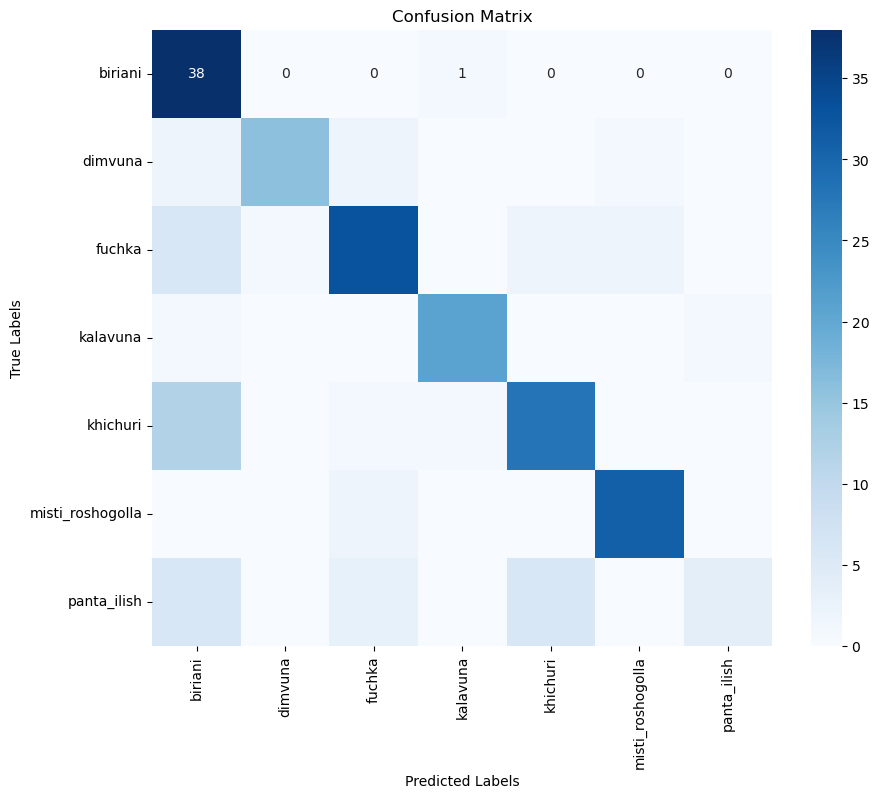

Classification Report:
                  precision    recall  f1-score   support

         biriani     0.5846    0.9744    0.7308        39
         dimvuna     0.9412    0.7619    0.8421        21
          fuchka     0.8049    0.7500    0.7765        44
        kalavuna     0.9130    0.9130    0.9130        23
        khichuri     0.7778    0.6667    0.7179        42
misti_roshogolla     0.9118    0.9394    0.9254        33
     panta_ilish     0.8000    0.2105    0.3333        19

        accuracy                         0.7738       221
       macro avg     0.8190    0.7451    0.7484       221
    weighted avg     0.8006    0.7738    0.7619       221



In [63]:

# Initialize empty lists for true and predicted labels
y_true = []
y_pred = []

# Get predictions and true labels from the test generator
for images, labels in validation_generator:
    # Predict classes for images in the batch
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted class indices
    y_true.extend(np.argmax(labels, axis=1))      # True class indices

    # Break the loop once all samples are processed
    if len(y_true) >= validation_generator.samples:
        break

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(validation_generator.class_indices.keys()),
            yticklabels=list(validation_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
report = classification_report(
    y_true, y_pred, target_names=list(validation_generator.class_indices.keys()), digits=4
)
print(report)

In [23]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_ds, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_ds, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Generate predictions on the validation dataset
y_pred = []
y_true = []

for images, labels in validation_ds:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert predictions to class indices
    y_true.extend(np.argmax(labels, axis=1))  # Convert one-hot labels to class indices

y_pred = np.array(y_pred, dtype=np.int32)
y_true = np.array(y_true, dtype=np.int32)

# Ensure consistent sizes
print(f"y_true length: {len(y_true)}, y_pred length: {len(y_pred)}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(7)],
            yticklabels=[f'Class {i}' for i in range(7)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in range(7)], digits=4)
print(report)

# Compute Precision, Recall, F1 Score for Multiclass
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')  # Macro-averaged sensitivity
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Macro-Averaged Precision: {precision:.4f}")
print(f"Macro-Averaged Recall: {recall:.4f}")
print(f"Macro-Averaged F1 Score: {f1:.4f}")



Validation Loss: 0.5789
Validation Accuracy: 0.8552
Training Loss: 0.0427
Training Accuracy: 0.9912


KeyboardInterrupt: 

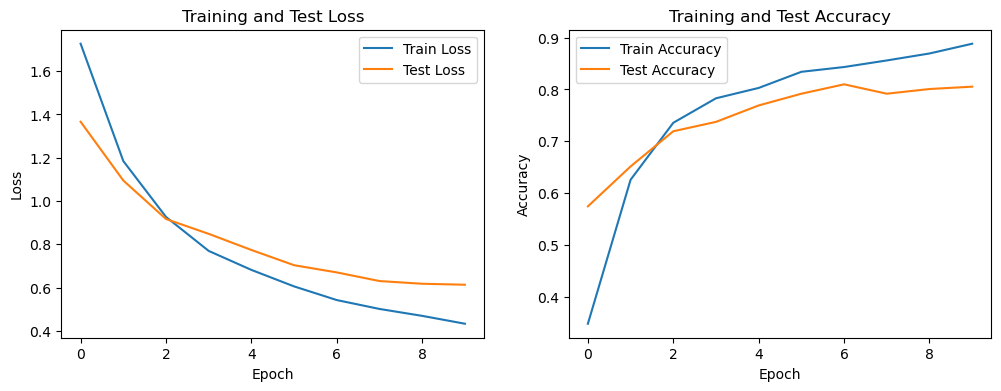

In [69]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

plt.show()
     